<font size="+2"><bold>RESULT PREDICTOR FOR BOXING MATHCES by DNN</bold></font>

<font size="+1">
<ul>
<li>This is a walk through a deep neural network which predicts outcome of a boxing match with no use of frameworks.</li>
<li>Prerequisites are understanding of all basic terms. </li>
<li>I have tried to explain every term as low as I could.</li>
<li>Even if you don't understand it at a first glance, don't worry.</li>
<li>I have not explain some term immediately as they are used, they must have been explained somewhere later.</li>
</ul>
</font>

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

<font size="+2">
</p> Functions for activations</p>
</font>
<font size="+1">
<ul>
<li>These are used as a threshold measure, like the way neurons in your brain fires after a certain thresholds. </li>
    <li>Now, a linear equation is easy to solve but they are limited in their complexity and have less power to learn complex functional mappings from data. A Neural Network without Activation function would simply be a Linear regression Model</li>
    <li>Here we have use a commonly used activation function ReLU((Rectified Linear Unit)).
    </ul>
    </font>
<font size="+1">
</p> This function will be used in forward propagation.</p>
</font>

In [2]:
#Z is the linear output of all the neuron of a layers stacked together in a matrix.
#A is called Post-activation parameter.
#both A and Z are of same dimensions.
#cache is for saving parameters used for calculating derivatives during backpropagation.
#range: (0,INF)

def relu(Z):
    A = np.maximum(0,Z)
    cache = Z
    
    return A, cache

#we will use sigmoid for final layer as we want our predictons either A wins or B 
#range: (0,1)

def sigmoid(Z):
    
    A = 1/(1+np.exp(-Z))
    
    cache = Z
    
    return A, cache

<font size="+1">
            </p>This will be used in back propagation. </p>
</font>

In [3]:
#this function will be used in back propagation.
#dA is the post-gradient parameter,i.e. partial derivation of cost funcion with respect to activation function A.
#cache is where we store Z for efficient calculation of gradients during backprop.
#this is specifically made for relu activation function, thus the name.
#calculation of derivative dZ is activation function dependent. 

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) 
    
    dZ[Z <= 0] = 0     
    
    return dZ

#Go through the maths for understanding how dZ = dA * s * (1-s)
def sigmoid_backward(dA, cache):
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)  
    
    return dZ

<font size="+2">We will do following Tasks</font>
<font size="+1">
<p>Making functions for the following:</p>
<ul>
<li>Forward Propagation</li>
<li>Computation of Loss</li>
<li>Backward Propagatoin</li>
    <li> Update Parameters</li>
      </ul>
<p>Loading data and buliding the complete network.</p>
  
    </font>

<font size="+2">Forward propagation</font>
<font size="+1">
<ul>
<li>Initialization parameters.</li>
<li>Linear Forward</li>
<li>Linear_Activation Forward</li>
<li>Forward_Layer Model</li>
    </ul>
    </font>

<font size="+2">Initializing parameters</font>
<p>
<font size="+1">It is done inorder to create weights and biases of required dimensions for needed calculations 
    and randomization of weights should be greater than 0, 
so that our model can learn. 
</font>
</p>

In [4]:
#variables are self-explanatory
#dimensions_of_layers is python list type for the number of units in different layers.

def initializing_parameters(dimensions_of_layers):
    

    #A seed is an initial value that is fed into a pseudo random number generator 
    #to start or kick off the process of random number generation.
    np.random.seed(1)
    
    #number of layers
    N = len(dimensions_of_layers)
    
    #intializing python dictionary for holding parameters
    parameters={}
    
    for n in range(1,N):
        
        #randomly initializing weights
        #dimensions for weights is (number of units in the present layer, number of units in previous layers)
        parameters['W' + str(n)] = np.random.randn(dimensions_of_layers[n], dimensions_of_layers[n - 1]) / np.sqrt(dimensions_of_layers[n-1])
        
        #initializing biases to zero 
        #dimensions for weights is (number of units in present layer,1)
        parameters['b' + str(n)] = np.zeros((dimensions_of_layers[n], 1))
    
    #return dictionary of initialized parameters    
    return parameters
    

In [5]:
#p=initializing_parameters([16,20,7,5,1])

<font size="+2">Linear Forward</font>
<p>$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$$</p>

<font size="+2">Linear Activation Forward</font>
<p>$$A = RELU(Z) = max(0, Z)$$</p>

In [6]:
#A-> activation parameter from previous layer
#W-> weight matrix of present layer
#b-> biase matrix of present layer
#applying ReLU on the linear function calculated above to evolve it from a simple linear regressor

def linear_activation_forward(A_prev, W, b, activation):

    #fetching values of Z and cache from linear_forward
    Z = np.dot(W, A_prev) + b
        
    #dictionary for storing W,b,A used during backprop
    linear_cache = (A_prev,W,b)
   
    if activation == "relu":     
        
        #this returns A-> activation parameter and the present value of Z to the activation_cache
        A, activation_cache = relu(Z)
        
    elif activation == "sigmoid":
        
        #this returns A-> activation parameter and the present value of Z to the activation_cache
        A, activation_cache = sigmoid(Z)
    
    #finaly we save our present layer's W,b,Z and previous layer's A_prev into cache dict for backprop use
    cache = (linear_cache, activation_cache)

    
    return A, cache

<font size="+2">Forward Layer Model </font>
<font size="+1"><p><center>Combining all forward functions</center></p></font>

In [7]:
#parameters from initializing_parameters

def forward_layer_model(features_matrix, parameters):
    
    #storage for storing caches of every layer
    caches = []
    
    #initializing A with features_matrix as it is the input layer
    A = features_matrix
    
    #number of layer, as parameters contain both W and b,
    N = len(parameters)//2
   

    #loop for applying above functions in every layer
    for n in range(1,N):
        
        #as the input layer is not included and A=features_matrix will be A^[0]
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(n)], parameters['b' + str(n)], activation='relu')
        
        #appending caches list
        caches.append(cache)
   
    AL, cache = linear_activation_forward(A, parameters['W' + str(N)], parameters['b' + str(N)], activation="sigmoid")
    caches.append(cache)

    #here A will be of last layer
    return AL, caches
    


In [8]:
#forward_layer_model(data_train_feature,p)

<font size="+2">Computation Of Loss</font>
<p>$$Cross Entropy(J)=-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))$$</p>

In [9]:
def cost_calc(A_l_layer, target_matrix):
    
    #m are number of examples in the data-sets 
    m=target_matrix.shape[1]
    
    cost = -(np.sum(np.multiply(target_matrix, np.log(A_l_layer)) + np.multiply(1 - target_matrix, np.log(1 - A_l_layer))))/m
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    
    return cost

<font size="+2">Backward propagation</font>
<font size="+1">
<ul>
<li>Linear Backward</li>
<li>Linear_Activation Backward</li>
<li>Backward_Layer Model</li>
    </ul>
    </font>
<font size="+1"><p>Backprop is needed inorder to calculate gradients of Loss function with respect to Parameters</p></font>

<font size="+2">Linear Backward</font>

$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} $$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} $$

In [10]:
def linear_backward(dZ, cache):
    
    #fetching values from cache in linear forward 
    A_prev, W,b = cache
    
    #m is the no. of columns in A_prev
    m=A_prev.shape[1]
    
    #gradient of loss function with respect to W
    dW = 1./m * np.dot(dZ,A_prev.T)
    
    #to preserve dimensions
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)    
    
    #gradient of loss function with respect to A_prev
    dA_prev = np.dot(W.T, dZ)
    
    #returning gradients
    return dA_prev, dW, db


<font size="+2">Linear activation Backward</font>
$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$


In [11]:
def linear_activation_backward(dA, caches , activation):
       
    linear_cache, activation_cache = caches
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

<font size="+2">Backward Layer Model</font>

<font size="+1"><p><center>Combining all backward functions</center></p></font>

In [12]:
def backward_layer_model(A_l_layer, target_matrix , caches):
    
    #intializing gradients dictionary for each layer
    grads={}
    
    #number of layers
    N=len(caches)
    
    #number of examples
    m=A_l_layer.shape[1]
    
    #making sure both target_matrix and A_last_layer are of shame dimensions

    target_matrix= target_matrix.reshape(A_l_layer.shape)
    
    dAL = - (np.divide(target_matrix, A_l_layer) - np.divide(1 - target_matrix, 1 - A_l_layer))
    
    #-1 is last dictionary of cache so
    current_cache = caches[-1]
    
    #fetching gradients of output layers into our dictionary
    grads["dA" + str(N)], grads["dW" + str(N)], grads["db" + str(N)] = linear_activation_backward(dAL,current_cache,"sigmoid")
    
    #iterating backwards for all hidden layers
    for n in reversed(range(N-1)):
        
        #taking caches from backwards
        current_cache = caches[n]
        
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(n + 2)], current_cache, activation = "relu")
        
        grads["dA" + str(n + 1)] = dA_prev_temp
        grads["dW" + str(n + 1)] = dW_temp
        grads["db" + str(n + 1)] = db_temp
        
    return grads

<font size="+2">Update Parameters</font>

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$

In [13]:
def update_parameters(parameters, grads, learning_rate):
    
    #number of layers
    L = len(parameters) // 2 

    #Update
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

<font size="+2">Predict Function</font>


In [14]:
def predict(features_matrix, target_matrix, parameters):
    
    #number of examples
    m = features_matrix.shape[1]
    
    #number of layers
    n = len(parameters) // 2 
    
    #initializing prediction matrix
    p = np.zeros((1, m),dtype=int)
    
    # Forward propagation
    probability, caches = forward_layer_model(features_matrix, parameters)


    # convert probability to 0/1 predictions
    #loop for each example
    for i in range(probability.shape[1]):
        
        if probability[0,i] > 0.5:
            p[0,i] = 1
        
        else:
            p[0,i] = 0

    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: %s" % str(np.sum(p == target_matrix)/float(m)))
        
    return p

In [15]:
#loading data which I had pre-processed and cleaned earlier
data=pd.read_csv("final_csv", sep=",")

ind=[]
for i in range(len(data["result"])):
    if (data["result"][i])==2:
            ind.append(i)
data.drop(ind, inplace=True)
data=data.reset_index(drop=True)
            
#normalising data columns
data['age_A']= data['age_A']/40
data['age_B']= data['age_B']/40
data['height_A']= data['height_A']/200
data['height_B']= data['height_B']/200
data['reach_A']= data['reach_A']/200
data['reach_B']= data['reach_B']/200
data['weight_A']= data['weight_A']/200
data['weight_B']= data['weight_B']/200
data['won_A']= data['won_A']/100
data['won_B']= data['won_B']/100
data['lost_A']= data['lost_A']/10
data['lost_B']= data['lost_B']/10
data['drawn_A']= data['drawn_A']/10
data['drawn_B']= data['drawn_B']/10
data['kos_A']= data['kos_A']/100
data['kos_B']=data['kos_B']/100

#taking 1090 win_B test cases
ind=[]
for i in range(len(data["result"])):
    if (data["result"][i])==1:
            ind.append(i)

data_one= data.iloc[ind]

#taking 1090 win_A cases
ind=[]
for i in range(len(data["result"])):
    if (data["result"][i])==0:
            ind.append(i)
    if len(ind)==1090:
        break
data_zero= data.iloc[ind]

data_one=data_one.append(data_zero)

data= data_one
data=data.reset_index(drop=True)
data = data.sample(frac=1)

#dividing data into three groups
#training dataframe
#validation dataframe for hyperparameters tuning
#testing dataframe to test model
data_train=data.head(n=1500) #training dataframe
data_test=data.iloc[1500:1840] # testing dataframe
data_validation=data.iloc[1840:2180] #validation dataframe



/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [16]:
#making features by converting above dataframes into numpy arrays
data_train_feature = data_train.as_matrix(columns=['age_A',
 'age_B',
 'height_A',
 'height_B',
 'reach_A',
 'reach_B',
 'weight_A',
 'weight_B',
 'won_A',
 'won_B',
 'lost_A',
 'lost_B',
 'drawn_A',
 'drawn_B',
 'kos_A',
 'kos_B'])

data_train_target = data_train.as_matrix(columns=['result'])

data_test_feature = data_test.as_matrix(columns=['age_A',
 'age_B',
 'height_A',
 'height_B',
 'reach_A',
 'reach_B',
 'weight_A',
 'weight_B',
 'won_A',
 'won_B',
 'lost_A',
 'lost_B',
 'drawn_A',
 'drawn_B',
 'kos_A',
 'kos_B'])

data_test_target = data_test.as_matrix(columns=['result'])

data_validation_feature = data_validation.as_matrix(columns=['age_A',
 'age_B',
 'height_A',
 'height_B',
 'reach_A',
 'reach_B',
 'weight_A',
 'weight_B',
 'won_A',
 'won_B',
 'lost_A',
 'lost_B',
 'drawn_A',
 'drawn_B',
 'kos_A',
 'kos_B'])

data_validation_target = data_validation.as_matrix(columns=['result'])


In [17]:
#correcting dimensions
#as we have examples as our columns
data_train_feature=data_train_feature.reshape((16,1500))
data_train_target=data_train_target.reshape((1,1500))

data_validation_feature=data_validation_feature.reshape((16,340))
data_validation_target=data_validation_target.reshape((1,340))

data_test_feature=data_test_feature.reshape((16,340))
data_test_target=data_test_target.reshape((1,340))

In [39]:
layers_dims = [16,10,8,16,10,8,1]

In [40]:
def NN(X, Y, layers_dims, learning_rate=3, num_iterations=3000, print_cost=False): 
   
    costs = []          
    
    # Parameters initialization.
    parameters = initializing_parameters(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
               
        # Forward propagation
        AL, caches = forward_layer_model(X, parameters)
    
        # Compute cost
        cost = cost_calc(AL, Y)
    
        # Backward propagation
        grads = backward_layer_model(AL, Y, caches)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
               # Print the cost every 100 training example
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.692764
Cost after iteration 1000: 0.676189
Cost after iteration 2000: 0.660084
Cost after iteration 3000: 0.650128
Cost after iteration 4000: 0.633951
Cost after iteration 5000: 0.616926
Cost after iteration 6000: 0.605217
Cost after iteration 7000: 0.563988
Cost after iteration 8000: 0.554435
Cost after iteration 9000: 0.557610
Cost after iteration 10000: 0.546272
Cost after iteration 11000: 0.510672
Cost after iteration 12000: 0.514653
Cost after iteration 13000: 0.467705
Cost after iteration 14000: 0.461463
Cost after iteration 15000: 0.529128
Cost after iteration 16000: 0.494729
Cost after iteration 17000: 0.427885
Cost after iteration 18000: 0.435771


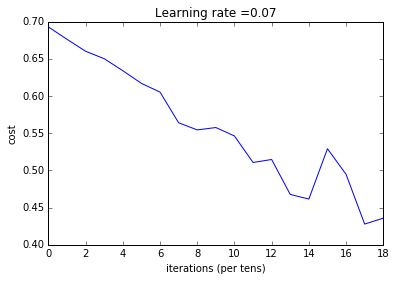

In [46]:
parameters = NN(data_train_feature, data_train_target, layers_dims, learning_rate=0.07,num_iterations=19000, print_cost=True)

In [47]:
p=predict(data_train_feature,data_train_target,parameters)

Accuracy: 0.8


In [ ]:
#fitting is about 80%

#the model is not yet optimized.
